In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Загрузка данных из датасета
df = pd.read_csv('Titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Значения колонок:

1. PassengerId - уникальный идентификатор пассажира.
2. Survived - целевой признак (0 - не выжил, 1 - выжил).
3. Pclass - класс билета (1, 2 или 3).
4. Name - имя пассажира.
5. Sex - пол пассажира.
6. Age - возраст пассажира.
7. SibSp - количество родственников на борту.
8. Parch - количество родителей и детей на борту.
9. Ticket - номер билета.
10. Fare - стоимость билета.
11. Cabin - номер каюты.
12. Embarked - порт отправления (C, Q, S).

In [39]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [40]:
#Описание набора данных
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
#Количество отсутствующих значений по столбцам
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Аналитика


У женского пола более высокий уровень выживаемости по сравнению с мужским полом

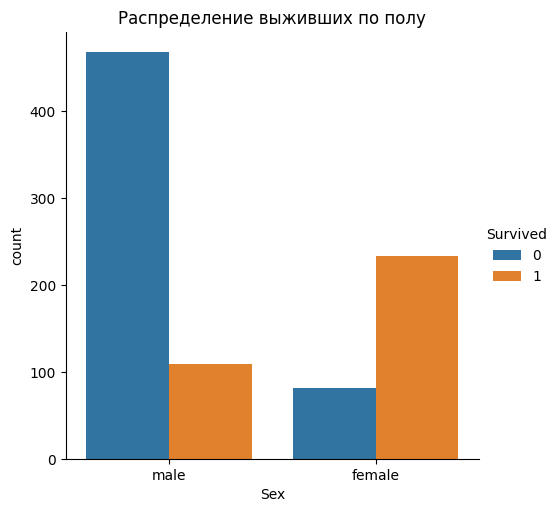

In [42]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title("Распределение выживших по полу")
plt.show()

Пассажиры с более дорогими билетами имеют более высокие показатели выживаемости

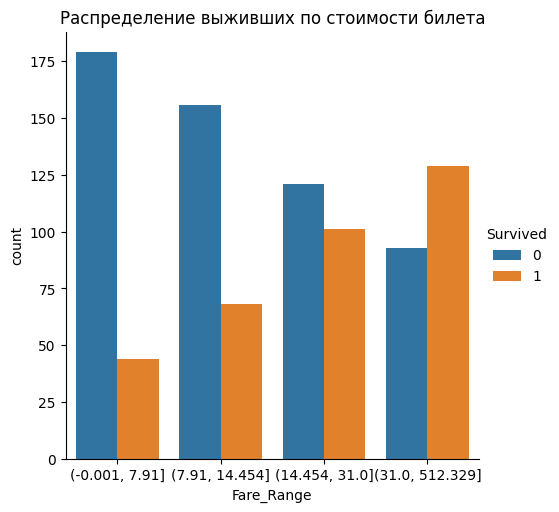

In [43]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

sns.catplot(x="Fare_Range", hue="Survived", kind="count", data=df)
plt.title("Распределение выживших по стоимости билета")
plt.show()

df = df.drop(columns=['Fare_Range'])

Пассажиры с одним, двумя или тремя родственниками имели более высокие показатели выживаемости

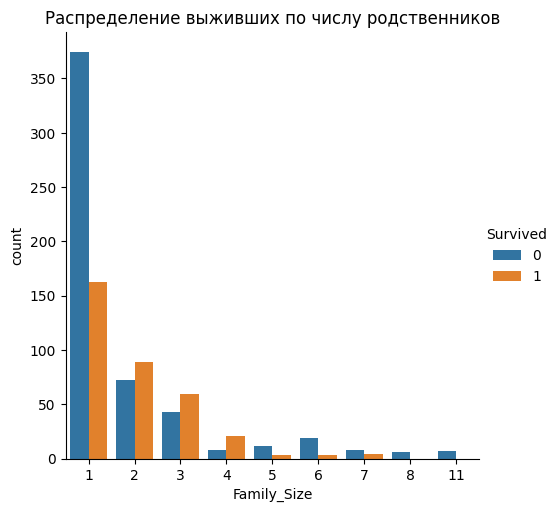

In [44]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

sns.catplot(x="Family_Size", hue="Survived", kind="count", data=df)
plt.title("Распределение выживших по числу родственников")
plt.show()

Дети имели более высокие показатели выживаемости, чем взрослые и пожилые

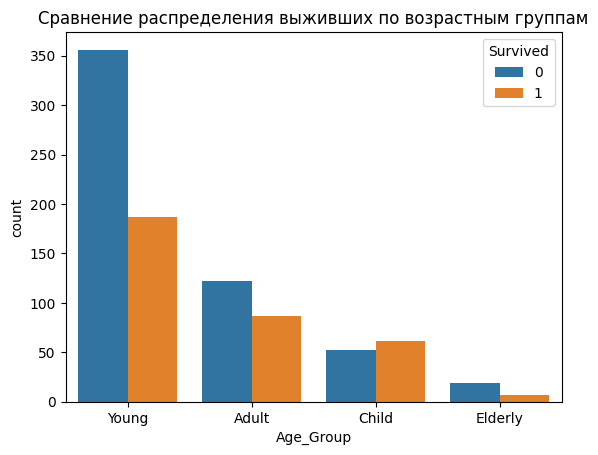

In [45]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 35:
        return 'Young'
    elif 35 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Age_Group'] = df['Age'].apply(age_group)

sns.countplot(x="Age_Group", hue="Survived", data=df)
plt.title("Сравнение распределения выживших по возрастным группам")
plt.show()

Пассажиры, севшие в порту C имели более высокие шансы на выживание

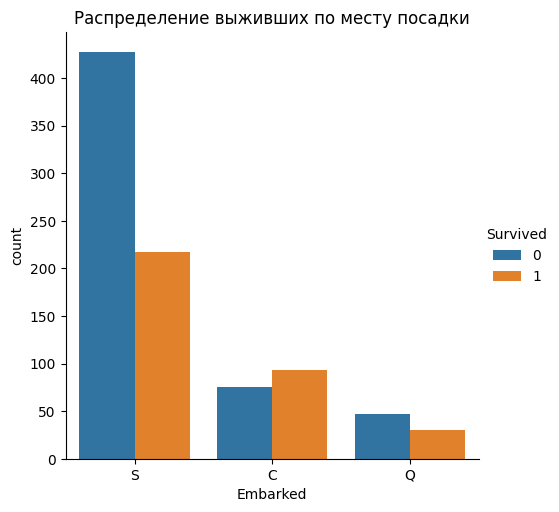

In [46]:
sns.catplot(x="Embarked", hue="Survived", kind="count", data=df)
plt.title("Распределение выживших по месту посадки")
plt.show()

Feature Engineering

Удаляем столбцы PassengerId, Name, Cabin и Ticket, чтобы очистить данные и уменьшить их размер, сохранив только те столбцы, которые важны для анализа и обучения модели

In [47]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

Заменим пропущенные значения в столбцах Age и Fare на медийные, для обработки отсутствующих данных, чтобы избежать потери информации из-за удаления строк с пропущенными данными

In [48]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].round()
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

Добавим новые признаки:
1. Family_Size - количество родственников
2. Is_Alone - признак, что человек один
3. Age_Group - признак возрастной группы ('Child', 'Young', 'Adult' и 'Elderly')
4. Fare_Category - признак категории цены билета ('Low', 'Medium' и 'High')

In [49]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)

def age_group(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 35:
        return 'Young'
    elif 35 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['Age_Group'] = df['Age'].apply(age_group)

def fare_category(fare):
    if fare < 10:
        return 'Low'
    elif 10 <= fare < 50:
        return 'Medium'
    else:
        return 'High'

df['Fare_Category'] = df['Fare'].apply(fare_category)

In [50]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Age_Group,Is_Alone,Fare_Category
0,0,3,male,22.0,1,0,7.0,S,2,Young,0,Low
1,1,1,female,38.0,1,0,71.0,C,2,Adult,0,High
2,1,3,female,26.0,0,0,8.0,S,1,Young,1,Low
3,1,1,female,35.0,1,0,53.0,S,2,Adult,0,High
4,0,3,male,35.0,0,0,8.0,S,1,Adult,1,Low


Модели

In [51]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [52]:
# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [53]:
# Обработка категориальных переменных
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

In [54]:
# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
# Инициализация KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
losses = []
val_losses = []

all_y_true = []
all_y_pred = []

In [56]:
# Кросс-валидация
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Используем EarlyStopping для предотвращения переобучения
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                        callbacks=[early_stopping], verbose=0)

    # Сохраняем значения потерь для текущей эпохи
    losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred_classes)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

c:\Users\Sergey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Выводится средняя точнсть модели, чтобы поннимать насколько хорошо модель предсказывает выживаемость пассажиров. График потерь позволяет оценить как обучалась модель. Строится матрица ошибок для квалификации положительных и отрицательных значений. Выводятся основные метрики, такие как точность и F1, информации о моделе

Средняя точность модели: 81.71%


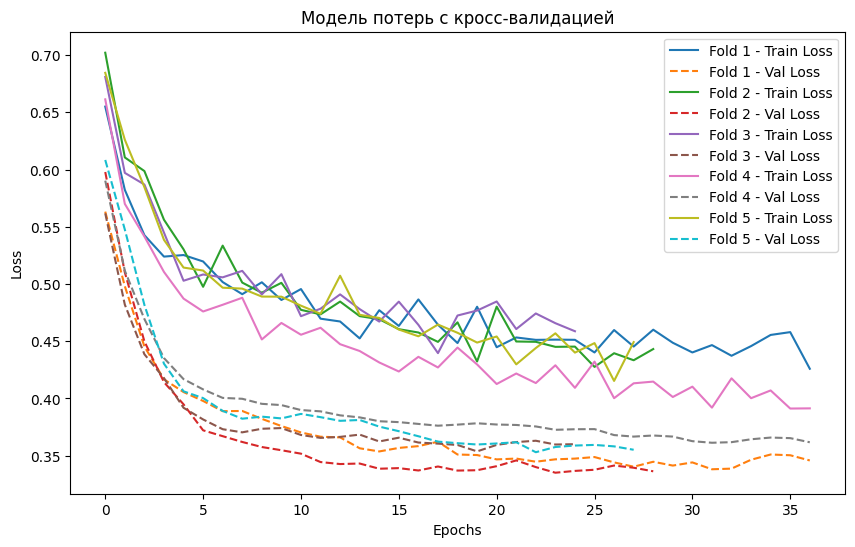

In [57]:
print(f'Средняя точность модели: {np.mean(accuracies) * 100:.2f}%')

# График потерь
plt.figure(figsize=(10, 6))
for i in range(len(losses)):
    plt.plot(losses[i], label=f'Fold {i+1} - Train Loss')
    plt.plot(val_losses[i], label=f'Fold {i+1} - Val Loss', linestyle='--')

plt.title('Модель потерь с кросс-валидацией')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

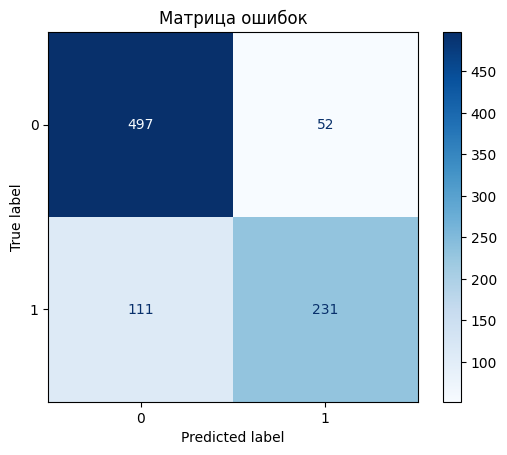

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.74       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891



In [58]:
# Построение матрицы ошибок
cm = confusion_matrix(all_y_true, all_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()

print(classification_report(all_y_true, all_y_pred))

График показывает, как потери изменяются в зависимости от числа эпох. Сравнение потерь на тренировочной и валидационной выборках позволяет оценить производительность модели. Если обе линии (тренировочная и валидационная) снижаются, это свидетельствует о том, что модель обучается и обобщает данные. Если валидационные потери начинают увеличиваться, в то время как тренировочные продолжают снижаться, это может указывать на переобучение модели.

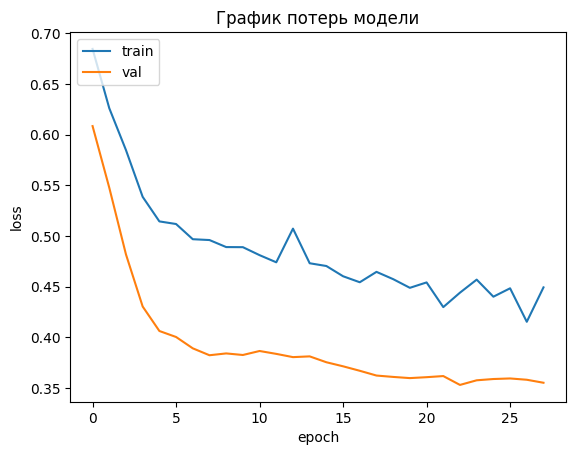

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График потерь модели')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()